In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
numpy.random.seed(7)
dataframe=pandas.read_csv('/content/drive/MyDrive/daejeon_1/DataSet/passengers.csv',
               usecols=[1],engine='python',skipfooter=3)
dataset=dataframe.values
dataset=dataset.astype('float32')
train_size=int(len(dataset)*0.67) # 2:1 로 분할 (시계열 데이터 랜덤으로 처리 불가)
test_size=len(dataset)-train_size
train,test=dataset[0:train_size,:],dataset[train_size:len(dataset),:]
print(len(train),len(test))

96 48


In [2]:
dataset.shape

(144, 1)

In [3]:
# window size( 데이터를 보는 사이즈): 다음 데이터에 영향을 미치는 갯수 : look_back
def create_dataset(dataset,look_back=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-look_back-1):
    a=dataset[i:(i+look_back),0]
    dataX.append(a)
    dataY.append(dataset[i+look_back,0])
  return numpy.array(dataX),numpy.array(dataY)
look_back=2
trainX,trainY=create_dataset(train,look_back)
testX,testY=create_dataset(test,look_back)

In [4]:
print(trainX[:10])
print(trainY[:10])

[[112. 118.]
 [118. 132.]
 [132. 129.]
 [129. 121.]
 [121. 135.]
 [135. 148.]
 [148. 148.]
 [148. 136.]
 [136. 119.]
 [119. 104.]]
[132. 129. 121. 135. 148. 148. 136. 119. 104. 118.]


In [5]:
model=Sequential()
model.add(Dense(8,input_dim=look_back,activation='relu')) # look_back=2 , 2x8 가중치 + bias
model.add(Dense(1)) # 8x1 가중치
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainX,trainY,epochs=200,batch_size=2,verbose=2)

trainScore=model.evaluate(trainX,trainY,verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore,math.sqrt(trainScore)))
testScore=model.evaluate(testX,testY,verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore,math.sqrt(testScore)))

Epoch 1/200
47/47 - 5s - loss: 51576.4023 - 5s/epoch - 105ms/step
Epoch 2/200
47/47 - 0s - loss: 44228.6641 - 100ms/epoch - 2ms/step
Epoch 3/200
47/47 - 0s - loss: 38725.9609 - 119ms/epoch - 3ms/step
Epoch 4/200
47/47 - 0s - loss: 33825.0820 - 108ms/epoch - 2ms/step
Epoch 5/200
47/47 - 0s - loss: 28608.1016 - 110ms/epoch - 2ms/step
Epoch 6/200
47/47 - 0s - loss: 23106.3809 - 110ms/epoch - 2ms/step
Epoch 7/200
47/47 - 0s - loss: 17832.8906 - 105ms/epoch - 2ms/step
Epoch 8/200
47/47 - 0s - loss: 12993.7988 - 122ms/epoch - 3ms/step
Epoch 9/200
47/47 - 0s - loss: 8970.6172 - 105ms/epoch - 2ms/step
Epoch 10/200
47/47 - 0s - loss: 5789.4233 - 115ms/epoch - 2ms/step
Epoch 11/200
47/47 - 0s - loss: 3624.4065 - 121ms/epoch - 3ms/step
Epoch 12/200
47/47 - 0s - loss: 2195.3826 - 127ms/epoch - 3ms/step
Epoch 13/200
47/47 - 0s - loss: 1372.7722 - 104ms/epoch - 2ms/step
Epoch 14/200
47/47 - 0s - loss: 935.2958 - 117ms/epoch - 2ms/step
Epoch 15/200
47/47 - 0s - loss: 718.2685 - 106ms/epoch - 2ms/step

In [6]:
# NLP( natural language)

In [7]:
from numpy import array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding

from tensorflow.keras.preprocessing.text import text_to_word_sequence
text='해보지 않으면 해낼 수 없다'
result=text_to_word_sequence(text)
print('\n원문:\n',text)
print('\n토큰화:\n',result)


원문:
 해보지 않으면 해낼 수 없다

토큰화:
 ['해보지', '않으면', '해낼', '수', '없다']


In [8]:
docs=['먼저 텍스트의 각 단어를 나누어 토큰화 합니다.',
      '텍스트의 단어로 토큰화 해야 딥러닝에서 인식됩니다.',
      '토큰화 한 결과는 딥러닝에서 사용 할 수 있습니다.',
      ]
token=Tokenizer() # 인스턴스
token.fit_on_texts(docs)
print('\n단어 카운트:\n',token.word_counts) # 단어별개수
print('\n문장 카운트: ',token.document_count) # 문장의 개수
print('\n각 단어가 몇개의 문장에 포함되어 있는가:\n',token.word_docs) # 단어가 문장에 몇개
print('\n각 단어에 매겨진 인덱스 값:\n',token.word_index) # 17개의 단어-> 인덱스 
# 이미지, 텍스트, 사운드 => 신경망에서는 숫자화 되어야한다
# 텍스트 모델이 예측을 한다면 결과는 숫자로 예측 


단어 카운트:
 OrderedDict([('먼저', 1), ('텍스트의', 2), ('각', 1), ('단어를', 1), ('나누어', 1), ('토큰화', 3), ('합니다', 1), ('단어로', 1), ('해야', 1), ('딥러닝에서', 2), ('인식됩니다', 1), ('한', 1), ('결과는', 1), ('사용', 1), ('할', 1), ('수', 1), ('있습니다', 1)])

문장 카운트:  3

각 단어가 몇개의 문장에 포함되어 있는가:
 defaultdict(<class 'int'>, {'토큰화': 3, '합니다': 1, '텍스트의': 2, '나누어': 1, '각': 1, '단어를': 1, '먼저': 1, '딥러닝에서': 2, '인식됩니다': 1, '해야': 1, '단어로': 1, '할': 1, '사용': 1, '결과는': 1, '있습니다': 1, '수': 1, '한': 1})

각 단어에 매겨진 인덱스 값:
 {'토큰화': 1, '텍스트의': 2, '딥러닝에서': 3, '먼저': 4, '각': 5, '단어를': 6, '나누어': 7, '합니다': 8, '단어로': 9, '해야': 10, '인식됩니다': 11, '한': 12, '결과는': 13, '사용': 14, '할': 15, '수': 16, '있습니다': 17}


In [9]:
docs=['너무 재밌네요','최고예요','참 잘 만든 영화예요','추천하고 싶은 영화입니다.',
      '한번 더 보고싶네요','글쎄요','별로예요','생각보다 지루하네요',
      '연기가 어색해요','재미없어요']
classes=array([1,1,1,1,1,0,0,0,0,0]) # 긍정 5, 부정 5
token=Tokenizer()
token.fit_on_texts(docs)
print(token.word_index)
x=token.texts_to_sequences(docs) # 문장을 -> sequence로 변경 (인덱스 번호)
print('\n리뷰 텍스트,토큰화 결과:\n',x) 
x_text=token.sequences_to_texts(x)
print('텍스트로\n',x_text)
padded_x=pad_sequences(x,4) # 신경망은 행렬곱연산 -> 사이즈가 동일
print('\n패딩 결과:\n',padded_x)
print('\n딥러닝 모델 시작:')
word_size=len(token.word_index)+1

{'너무': 1, '재밌네요': 2, '최고예요': 3, '참': 4, '잘': 5, '만든': 6, '영화예요': 7, '추천하고': 8, '싶은': 9, '영화입니다': 10, '한번': 11, '더': 12, '보고싶네요': 13, '글쎄요': 14, '별로예요': 15, '생각보다': 16, '지루하네요': 17, '연기가': 18, '어색해요': 19, '재미없어요': 20}

리뷰 텍스트,토큰화 결과:
 [[1, 2], [3], [4, 5, 6, 7], [8, 9, 10], [11, 12, 13], [14], [15], [16, 17], [18, 19], [20]]
텍스트로
 ['너무 재밌네요', '최고예요', '참 잘 만든 영화예요', '추천하고 싶은 영화입니다', '한번 더 보고싶네요', '글쎄요', '별로예요', '생각보다 지루하네요', '연기가 어색해요', '재미없어요']

패딩 결과:
 [[ 0  0  1  2]
 [ 0  0  0  3]
 [ 4  5  6  7]
 [ 0  8  9 10]
 [ 0 11 12 13]
 [ 0  0  0 14]
 [ 0  0  0 15]
 [ 0  0 16 17]
 [ 0  0 18 19]
 [ 0  0  0 20]]

딥러닝 모델 시작:


In [10]:
# 단어 임베딩을 포함하여 딥러닝 모델을 만들고 결과를 출력
model=Sequential()
# text는 onhot encoding
# 21인 경우 21
model.add(Embedding(word_size,8,input_length=4)) # 8개의 숫자로 두 단어의 관계성까지
# 임베딩: 고차원을 저차원으로
# 밀집 행렬로 재표현
# sparse 행렬로 표현 => 학습결과 좋지 못함 
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(padded_x,classes,epochs=20)
print('\n Accuracy: %.4f' %(model.evaluate(padded_x,classes)[1]))

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 0.6770 - accuracy: 0.7000
Epoch 2/20
1/1 [==============================] - 0s 12ms/step - loss: 0.6747 - accuracy: 0.8000
Epoch 3/20
1/1 [==============================] - 0s 15ms/step - loss: 0.6725 - accuracy: 0.8000
Epoch 4/20
1/1 [==============================] - 0s 13ms/step - loss: 0.6702 - accuracy: 0.8000
Epoch 5/20
1/1 [==============================] - 0s 11ms/step - loss: 0.6680 - accuracy: 0.8000
Epoch 6/20
1/1 [==============================] - 0s 10ms/step - loss: 0.6657 - accuracy: 0.9000
Epoch 7/20
1/1 [==============================] - 0s 10ms/step - loss: 0.6635 - accuracy: 0.9000
Epoch 8/20
1/1 [==============================] - 0s 13ms/step - loss: 0.6612 - accuracy: 0.9000
Epoch 9/20
1/1 [==============================] - 0s 10ms/step - loss: 0.6590 - accuracy: 0.9000
Epoch 10/20
1/1 [==============================] - 0s 11ms/step - loss: 0.6567 - accuracy: 0.9000
Epoch 11/20
1/1 [==============

In [11]:
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras.layers import Dense,LSTM,Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
seed=0
numpy.random.seed(seed)
tf.random.set_seed(3)
# 뉴스기사
# 1000개의 단어만 사용해서 뉴스기사를 indexing
# 원본데이터가 아닌 mapping된 숫자만 제공:
# token.texts_to_sequences(docs)된 데이터를 제
(X_train,Y_train),(X_test,Y_test)=reuters.load_data(num_words=1000,
                                                    test_split=0.2)
category=numpy.max(Y_train)+1
print(category,'카테고리')
print(len(X_train),'학습용 뉴스 기사')
print(len(Y_train),'테스트용 뉴스 기사')
print(X_train[0])

2110848/2110848 [==============================] - 0s 0us/step
46 카테고리
8982 학습용 뉴스 기사
8982 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [12]:
# 단어의 숫자 중요, 패딩이 중요하다 
# 단어의 인덱스로 재표현
# 100 단어로 표현되는 기사( 넘으면 삭제하고 작으면 0으로 채움)
x_train=sequence.pad_sequences(X_train,maxlen=100)
x_test=sequence.pad_sequences(X_test,maxlen=100)
y_train=to_categorical(Y_train)
y_test=to_categorical(Y_test)

In [13]:
model=Sequential() 
# 단어가 분류-> 100사이즈의 벡터로 표현
model.add(Embedding(1000,100)) # 입력되는 100사이즈
# LSTM망 -> 텍스트의 특징을 추출 ( 가중치를 이용 -> 이전 텍스트를 고려한 특징)
model.add(LSTM(100,activation='tanh')) # 출력되는 100 사이즈
# FFNN
model.add(Dense(46,activation='softmax')) # 문서의 종류가 46개 (경제 , 정치 , 문화...)

Epoch 1/20
90/90 [==============================] - 16s 145ms/step - loss: 2.5545 - accuracy: 0.3583 - val_loss: 2.0893 - val_accuracy: 0.4849
Epoch 2/20
90/90 [==============================] - 3s 39ms/step - loss: 1.9329 - accuracy: 0.5055 - val_loss: 1.8073 - val_accuracy: 0.5280
Epoch 3/20
90/90 [==============================] - 3s 30ms/step - loss: 1.7513 - accuracy: 0.5469 - val_loss: 1.7467 - val_accuracy: 0.5472
Epoch 4/20
90/90 [==============================] - 3s 36ms/step - loss: 1.7217 - accuracy: 0.5478 - val_loss: 1.7830 - val_accuracy: 0.5214
Epoch 5/20
90/90 [==============================] - 2s 21ms/step - loss: 1.6870 - accuracy: 0.5501 - val_loss: 1.6991 - val_accuracy: 0.5539
Epoch 6/20
90/90 [==============================] - 1s 14ms/step - loss: 1.5993 - accuracy: 0.5803 - val_loss: 1.6114 - val_accuracy: 0.6011
Epoch 7/20
90/90 [==============================] - 2s 26ms/step - loss: 1.5210 - accuracy: 0.6108 - val_loss: 1.5121 - val_accuracy: 0.6224
Epoch 8/20


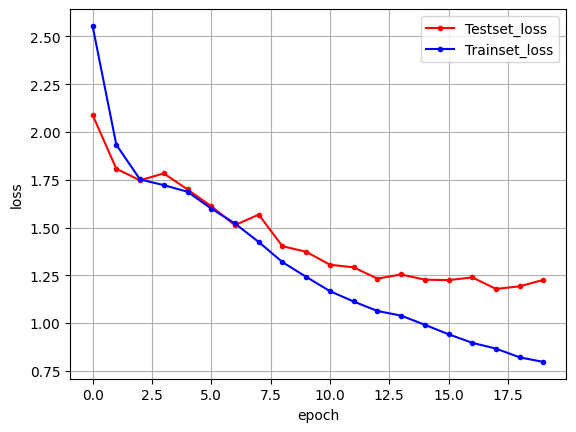

In [14]:
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [21]:
from tensorflow.keras.datasets import imdb
# Conv1D
from tensorflow.keras.layers import Conv1D,MaxPooling1D,Dropout,Activation
seed=0
numpy.random.seed(seed)
tf.random.set_seed(3)
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=5000)

x_train=sequence.pad_sequences(x_train,maxlen=100)
x_test=sequence.pad_sequences(x_test,maxlen=100)

In [22]:
# 하나의 영화평은 100개의 단어로 이루어짐
# 영화평은 단어의 인덱스로 표현
# 단어로 재표현(원핫인코딩) -> 임베딩 (100자리의 벡터로)
model=Sequential()
model.add(Embedding(5000,100))# 벡터로 변
# 100개의 단어가 100개의 벡터로 변환되어서 입력
model.add(Dropout(0.5))
# convolution의 의미는 이미지에서 주변값을 고려하여 특징
# 단어의 주변값을 고려한 특징
# 주변의 5개의 단어를 고려한 값으로 재표현
# padding은 same,valid
# 100-5+1 = 96으로 나감, 64개의 필터
# 5x64
model.add(Conv1D(64,5,padding='valid',activation='relu',strides=1))
# 32064
# 5x64 x100 +64
# 100x100 => 출력 100x96
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55)) # 나가는 특징의 사이즈: 단어마다 cell이 필요 (셀이 100개)
# 마지막에 나가는 것은 100에서 특징을 잡아서 마지막 한개가 출력하는 hidden stae값이 출
# 마지막 차수는 55
# 55x1 +1 
model.add(Dense(1)) # 마지막 긍정, 부정을 판별
model.add(Activation('sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout_2 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d_2 (Conv1D)           (None, None, 64)          32064     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, None, 64)         0         
 1D)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 55)                26400     
                                                                 
 dense_6 (Dense)             (None, 1)                 56        
                                                      

Epoch 1/5
250/250 [==============================] - 39s 123ms/step - loss: 0.4556 - accuracy: 0.7646 - val_loss: 0.3616 - val_accuracy: 0.8451
Epoch 2/5
250/250 [==============================] - 11s 43ms/step - loss: 0.2979 - accuracy: 0.8731 - val_loss: 0.3314 - val_accuracy: 0.8584
Epoch 3/5
250/250 [==============================] - 6s 22ms/step - loss: 0.2536 - accuracy: 0.8970 - val_loss: 0.3281 - val_accuracy: 0.8574
Epoch 4/5
250/250 [==============================] - 6s 25ms/step - loss: 0.2167 - accuracy: 0.9138 - val_loss: 0.3372 - val_accuracy: 0.8524
Epoch 5/5
782/782 [==============================] - 4s 4ms/step - loss: 0.3744 - accuracy: 0.8477

 Test Accuracy: 0.8477


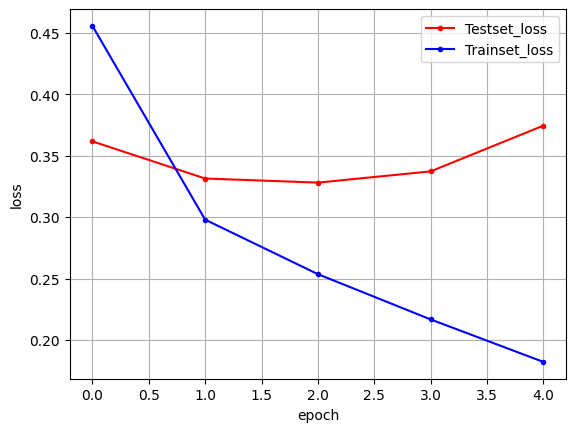

In [23]:
history=model.fit(x_train,y_train,batch_size=100,epochs=5,
                  validation_data=(x_test,y_test))
print('\n Test Accuracy: %.4f' % (model.evaluate(x_test,y_test)[1]))
y_vloss=history.history['val_loss']
y_loss=history.history['loss']
x_len=numpy.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='.',c='red',label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [25]:
print(type(x_train))
print(x_train.shape)
print(x_train[20001])
print(type(x_train[20000]))
print(y_train[1])
# dictionary
dictionary=imdb.get_word_index(path='imdb_word_index.json')
type(dictionary)
print(len(dictionary))
imdb_key=dictionary.keys()
print(type(imdb_key))

keytotal=list(imdb_key)
sentance=[]
for x,num in enumerate(x_train[1]):
  res=keytotal[x]
  sentance.append(res)
print(sentance)

<class 'numpy.ndarray'>
(25000, 100)
[  87   51  575   36   26  502    8   79  101  156    5 1507   36  181
    4  118    7   68   58   21  820  910 1030    8    2  183   56   11
 2716    7   68    2 4697   10   10  910   70 4146    4  118  927    4
  118 1180    5  907   21  131   36    2  183   56   14   20    9  595
    4  619  155    9   15   13 1781  910   11   68    2  127   24   60
  124   54    6   20    9   52   42   78   10   10   12    9   64  688
    8    4  676    7    4  156   15   13   70   60  202   12    6  342
    7  158]
<class 'numpy.ndarray'>
0
88584
<class 'dict_keys'>
['fawn', 'tsukino', 'nunnery', 'sonja', 'vani', 'woods', 'spiders', 'hanging', 'woody', 'trawling', "hold's", 'comically', 'localized', 'disobeying', "'royale", "harpo's", 'canet', 'aileen', 'acurately', "diplomat's", 'rickman', 'arranged', 'rumbustious', 'familiarness', "spider'", 'hahahah', "wood'", 'transvestism', "hangin'", 'bringing', 'seamier', 'wooded', 'bravora', 'grueling', 'wooden', 'wedne

In [1]:
from tensorflow import keras
imdb=keras.datasets.imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(
    num_words=10000
)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
word_index=imdb.get_word_index()
word_index={k:(v+3) for k,v in word_index.items()}
word_index['<PAD>']=0
word_index['<START>']=1
word_index['<UNK>']=2 # unknown
word_index['<UNUSED>']=3
reverse_word_index=dict([(value,key)for(key,value)in word_index.items()])
def decode_review(text):
  return ' '.join([reverse_word_index.get(i,'?') for i in text])

1641221/1641221 [==============================] - 0s 0us/step


In [3]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [4]:
train_data=keras.preprocessing.sequence.pad_sequences(train_data,value=word_index['<PAD>'],padding='post',maxlen=256)
test_data=keras.preprocessing.sequence.pad_sequences(test_data,value=word_index['<PAD>'],padding='post',maxlen=256)

In [7]:
import tensorflow as tf
vocab_size=10000
model=keras.Sequential()
model.add(keras.layers.Embedding(vocab_size,16,input_shape=(None,)))
# model.add(keras.layers.GlobalAveragePooling1D()) # convolution에서 사용하던 풀링을 데이터 소실없이 차원을 축소하는 용도
model.add(keras.layers.Bidirectional(tf.keras.layers.LSTM(16))) # 이중으로 특징 추출
model.add(keras.layers.Dense(16,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 16)          160000    
                                                                 
 bidirectional (Bidirectiona  (None, 32)               4224      
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 164,769
Trainable params: 164,769
Non-trainable params: 0
_________________________________________________________________


In [8]:
# attention(RNN+attention관계성망)/ self - attention(RNN을 제거하고 자체 attention)

# BahdanauAttention
# image - catptioning

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import re
import numpy as np
import os
import time
import json
from glob import glob
from PIL import Image
import pickle

# MS_COCO 데이터 세트
# 82000장의 이미지, 이미지당 5개의 caption(텍스트)
# image captioning ( seq2seq 망 )
# attention망을 구축


In [58]:
annotation_folder='/annotations/'
if not os.path.exists(os.path.abspath('.')+annotation_folder):
  annotation_zip=tf.keras.utils.get_file('captions.zip',
                                         cache_subdir=os.path.abspath('.'),
                                         origin='http://images.cocodataset.org/annotations/annotations_trainval2014.zip',
                                         extract=True)
  annotation_file=os.path.dirname(annotation_zip)+'/annotations/captions_train2014.json'
  os.remove(annotation_zip)
#Download image files
image_folder='/train2014/'
if not os.path.exists(os.path.abspath('.')+image_folder):
  image_zip=tf.keras.utils.get_file('train2014.zip',
                                    cache_subdir=os.path.abspath('.'),
                                    origin='http://images.cocodataset.org/zips/train2014.zip',
                                    extract=True)
  PATH=os.path.dirname(image_zip)+image_folder
  os.remove(image_zip)
else:
  PATH=os.path.abspath('.')+image_folder

In [59]:
with open(annotation_file,'r') as f:
  annotations=json.load(f)
all_captions=[] # 캡션 
all_img_name_vector=[] # 이미지 위치
for annot in annotations['annotations']:
  caption='<start>'+annot['caption']+'<end>'
  # seq2seq = encoder + decoder
  # 끝을 표시해야 되는 이유는 padding을 해 놓아서 단어가 없을 수도 있기 때문에
  # start를 넣어야 하는 이유는 encoder에서 마지막에 출력되는 state가
  # decoder의 첫번째 입력 
  image_id=annot['image_id']
  full_coco_image_path=PATH+'COCO_train2014_'+'%012d.jpg'%(image_id)
  all_img_name_vector.append(full_coco_image_path)
  all_captions.append(caption)
train_captions,img_name_vector=shuffle(all_captions,all_img_name_vector,random_state=1)
num_examples=30000
train_captions=train_captions[:num_examples]
img_name_vector=img_name_vector[:num_examples]

In [60]:
def load_image(image_path):
  img=tf.io.read_file(image_path)
  img=tf.image.decode_jpeg(img,channels=3)
  img=tf.image.resize(img,(299,299))
  # preprocessing_input 이미지 전처리는 사이즈, 정규화(-1~1사이의 값으로)
  # 127.5로 나누고 -1
  img=tf.keras.applications.inception_v3.preprocess_input(img)
  return img,image_path

In [61]:
# ConvNet
# inceptionV3(wide) #VGG16(3x3) # ResNet(Residual) # EfficientNet(depth,wider,resolution)
image_model=tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')
new_input=image_model.input
hidden_layer=image_model.layers[-1].output # 결과값이 decoder로 입력
image_features_extract_model=tf.keras.Model(new_input,hidden_layer)
# 앞단에는 이미지 뒷단에는 텍스트
#          encoder         decoder

In [62]:
encode_train=sorted(set(img_name_vector))
image_dataset=tf.data.Dataset.from_tensor_slices(encode_train)
image_dataset=image_dataset.map(
    load_image,num_parallel_calls=tf.data.experimental.AUTOTUNE
).batch(16)
for img,path in image_dataset:
  batch_features=image_features_extract_model(img)
  batch_features=tf.reshape(batch_features,(batch_features.shape[0],-1,batch_features.shape[3])) # 학습행렬 형태로 변형 # 데이터가 3차원
  for bf,p in zip(batch_features,path): 
    path_of_feature=p.numpy().decode('utf-8')
    np.save(path_of_feature,bf.numpy()) # 학습할 때는 전처리 신경x 로딩 사용

In [63]:
def calc_max_length(tensor):
  return max(len(t) for t in tensor)

In [64]:
top_k=5000#dictionary 단어수
tokenizer=tf.keras.preprocessing.text.Tokenizer(num_words=top_k,oov_token='<unk>',
                                                filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~')
tokenizer.fit_on_texts(train_captions)
train_seqs=tokenizer.texts_to_sequences(train_captions)

In [65]:
tokenizer.word_index['<pad>']=0
tokenizer.index_word[0]='<pad>'
train_seqs=tokenizer.texts_to_sequences(train_captions)
cap_vector=tf.keras.preprocessing.sequence.pad_sequences(train_seqs,padding='post')
max_length=calc_max_length(train_seqs)

In [66]:
img_name_train,img_name_val,cap_train,cap_val=train_test_split(img_name_vector,cap_vector,test_size=0.2,random_state=0)

In [67]:
BATCH_SIZE=64
BUFFER_SIZE=1000
embedding_dim=256
units=512
vocab_size=top_k+1
num_steps=len(img_name_train)//BATCH_SIZE
features_shape=2048
attention_features_shape=64

In [82]:
def map_func(img_name,cap):
  img_tensor=np.load(img_name.decode('utf-8')+'.npy')
  return img_tensor,cap

In [83]:
dataset=tf.data.Dataset.from_tensor_slices((img_name_train,cap_train))
dataset=dataset.map(lambda item1,item2:tf.numpy_function(
    map_func,[item1,item2],[tf.float32,tf.int32]
),num_parallel_calls=tf.data.experimental.AUTOTUNE)
dataset=dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset=dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [84]:
class BahadanauAttention(tf.keras.Model):
  def __init__(self,units):
    super(BahadanauAttention,self).__init__()
    self.W1=tf.keras.layers.Dense(units)
    self.W2=tf.keras.layers.Dense(units)
    self.V=tf.keras.layers.Dense(1)
  def call(self,features,hidden): # RNN망으로 각 단어에서 추출된 특성
    hidden_with_time_axis=tf.expand_dims(hidden,1) # 차원확대
    # -1 1 사이의 값으로 추출
    score=tf.nn.tanh(self.W1(features)+self.W2(hidden_with_time_axis))
    attention_weights=tf.nn.softmax(self.V(score),axis=1) # 분포
    context_vector=attention_weights*features
    context_vector=tf.reduce_sum(context_vector,axis=1)
    return context_vector,attention_weights # 관계성을 고려한 특징벡터, 확률(합하면 1)

In [85]:
class CNN_Encoder(tf.keras.Model):
  def __init__(self,embedding_dim):
    super(CNN_Encoder,self).__init__()
    self.fc=tf.keras.layers.Dense(embedding_dim) 
  def call(self,x):
    x=self.fc(x)
    x=tf.nn.relu(x)
    return x

In [86]:
class RNN_Decoder(tf.keras.Model):
  # 하나의 단어가 표현될 벡터수, LSTM(GRU)에서 출력되는 특징벡터, 전체단어수(dictionary)
  # 로딩되는 문서 내용
  def __init__(self,embedding_dim,units,vocab_size):
    super(RNN_Decoder,self).__init__()
    self.units=units
    self.embedding=tf.keras.layers.Embedding(vocab_size,embedding_dim)
    # RNN(기울기소실발생) -> LSTM( Control state, hidden state) 계산이 많음
    # GRU(계산이 작게 - 내용은 LSTM을 유지하면서 )
    # return_sequences=True 모든 단어로부터 출력되는 특징을 모두 사용하려면
    self.gru=tf.keras.layers.GRU(self.units,return_sequences=True,
                                 return_state=True,
                                 # 행렬을 초기화 할 때 random으로 하지만 초기화 방법을 변경 
                                 recurrent_initializer='glorot_uniform')
    self.fc1=tf.keras.layers.Dense(self.units)
    self.fc2=tf.keras.layers.Dense(vocab_size)
    self.attention=BahadanauAttention(self.units)
  def call(self,x,features,hidden):
    # attention distribution 분포값 
    context_vector, attention_weights=self.attention(features,hidden)
    x=self.embedding(x)
    x=tf.concat([tf.expand_dims(context_vector,1),x],axis=-1)
    output,state=self.gru(x)
    x=self.fc1(output)
    x=tf.reshape(x,(-1,x.shape[2]))
    x=self.fc2(x)
    return x,state,attention_weights
  def reset_state(self,batch_size):
    return tf.zeros((batch_size,self.units))

In [87]:
# seq2seq망 (번역망) + attention
encoder=CNN_Encoder(embedding_dim)
decoder=RNN_Decoder(embedding_dim,units,vocab_size)

In [88]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred) # .SparseCategoricalCrossentropy

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

In [89]:
checkpoint_path = "./checkpoints/train"
ckpt = tf.train.Checkpoint(encoder=encoder, # 좋은 모델을 선택하기 위해
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [90]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
  start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1]) # epoch가 저장
  # restoring the latest checkpoint in checkpoint_path
  ckpt.restore(ckpt_manager.latest_checkpoint)

In [91]:
@tf.function
def train_step(img_tensor,target):
  loss=0
  hidden=decoder.reset_state(batch_size=target.shape[0])# zero
  # 개수
  # 행을 열로 만듬
  dec_input=tf.expand_dims([tokenizer.word_index['<start>']]*target.shape[0],1)
  with tf.GradientTape() as tape: # 미분한 결과값을 저장
    features = encoder(img_tensor)
    for i in range(1,target.shape[1]):
      predictions,hidden,_=decoder(dec_input,features,hidden)
      loss +=loss_function(target[:,i],predictions)
      dec_input=tf.expand_dims(target[:,i],i)
  total_loss=(loss/int(target.shape[1]))
  # 가중치 수정 ( 역전파 )
  trainable_variables=encoder.trainable_variables+decoder.trainable_variables
  gradients=tape.gradient(loss,trainable_variables) # 미분
  optimizer.apply_gradients(zip(gradients,trainable_variables)) # 가중치에 적용 
  return loss,total_loss

In [92]:
EPOCHS=20
for epoch in range(start_epoch,EPOCHS): # 데이터가 많음: 중도에 학습중
  start=time.time()
  total_loss=0
  # from_tensor_slice( 이미지 파일은 전처리해서 다시 파일로 저장 )를 이용해서 
  for(batch,(img_tensor,target)) in enumerate(dataset): # 이미지 + 캡션 (배치사이즈 64)
    batch_loss,t_loss=train_step(img_tensor,target)
    total_loss+=t_loss
    if batch % 100 ==0:
      print('Epoch {} Batch {} Loss {:.4f}'.format(
          epoch+1,batch,batch_loss.numpy()/int(target.shape[1])
      ))
  loss_plot.append(total_loss/num_steps)
  if epoch %5==0:
    ckpt_manager.save()
  print('Epoch {} Loss {:.6f}'.format(epoch+1,total_loss/num_steps))
  print('Time taken for 1 epoch {} sec\n'.format(time.time()-start))

ValueError: ignored